In [4]:
pip install pandas


                                              0.0/10.7 MB ? eta -:--:--
                                              0.0/10.7 MB 2.0 MB/s eta 0:00:06
                                             0.1/10.7 MB 787.7 kB/s eta 0:00:14
                                              0.2/10.7 MB 1.1 MB/s eta 0:00:10
                                              0.2/10.7 MB 1.4 MB/s eta 0:00:08
     -                                        0.3/10.7 MB 1.4 MB/s eta 0:00:08
     -                                        0.3/10.7 MB 1.3 MB/s eta 0:00:08
     -                                        0.4/10.7 MB 1.3 MB/s eta 0:00:08
     -                                        0.5/10.7 MB 1.5 MB/s eta 0:00:07
     --                                       0.5/10.7 MB 1.4 MB/s eta 0:00:08
     --                                       0.6/10.7 MB 1.3 MB/s eta 0:00:08
     --                                       0.6/10.7 MB 1.2 MB/s eta 0:00:09
     --                                       0.7/10.7 MB

In [5]:
from __future__ import print_function
import pandas as pd

In [35]:
data=pd.read_csv('data.csv')

In [49]:
import numpy as np

# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(data, threshold=1.5):
    # 1사분위수와 3사분위수 계산
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # IQR 계산
    iqr = q3 - q1
    
    # 이상치 범위 계산
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # 이상치 탐지
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    
    return outliers

In [47]:
data

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process,tool_condition,error
0,202.0,4.0000,4.00,202.0,4.0,4.000000,0.180,0.0207,329,2.77,...,329,0.0,6.960000e-07,16.0,1,0,50,0,0,0
1,202.0,-6.8000,-346.00,202.0,-9.6,-354.000000,-10.900,0.1860,328,23.30,...,328,0.0,-5.270000e-07,16.0,1,4,50,1,0,0
2,200.0,-13.8000,-2.25,200.0,-13.9,3.999905,-8.590,0.1400,328,30.60,...,328,0.0,9.100000e-07,16.0,1,7,50,1,0,0
3,198.0,-14.0000,4.00,198.0,-13.9,3.999905,-6.110,0.1300,327,30.30,...,328,0.0,1.070000e-06,16.0,1,7,50,1,0,0
4,197.0,-13.9000,-14.80,196.0,-13.9,4.000095,-5.700,0.1140,328,30.50,...,328,0.0,1.960000e-06,16.0,1,7,50,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,179.0,3.5625,8.15,179.0,3.5,5.000000,-0.941,0.0215,328,1.79,...,328,0.0,-3.020000e-06,17.0,1,0,20,9,1,0
32044,178.5,3.5350,30.00,178.5,3.5,5.000000,-0.780,0.0202,328,1.07,...,328,0.0,0.000000e+00,17.0,1,0,20,9,1,0
32045,178.5,3.5475,17.50,178.5,3.5,5.000000,0.501,0.0190,328,0.99,...,328,0.0,0.000000e+00,17.0,1,0,20,9,1,0
32046,178.5,3.4475,11.25,178.5,3.5,5.000000,-0.298,0.0193,328,1.37,...,328,0.0,-7.980000e-06,17.0,1,0,20,9,1,0


In [81]:
data_numeric=data.drop(columns=['M_CURRENT_PROGRAM_NUMBER', 'M_sequence_number', 'Machining_Process', 'tool_condition'])


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32048 entries, 0 to 32047
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X_ActualPosition          32048 non-null  float64
 1   X_ActualVelocity          32048 non-null  float64
 2   X_ActualAcceleration      32048 non-null  float64
 3   X_SetPosition             32048 non-null  float64
 4   X_SetVelocity             32048 non-null  float64
 5   X_SetAcceleration         32048 non-null  float64
 6   X_CurrentFeedback         32048 non-null  float64
 7   X_DCBusVoltage            32048 non-null  float64
 8   X_OutputCurrent           32048 non-null  int64  
 9   X_OutputVoltage           32048 non-null  float64
 10  X_OutputPower             32048 non-null  float64
 11  Y_ActualPosition          32048 non-null  float64
 12  Y_ActualVelocity          32048 non-null  float64
 13  Y_ActualAcceleration      32048 non-null  float64
 14  Y_SetP

<Axes: >

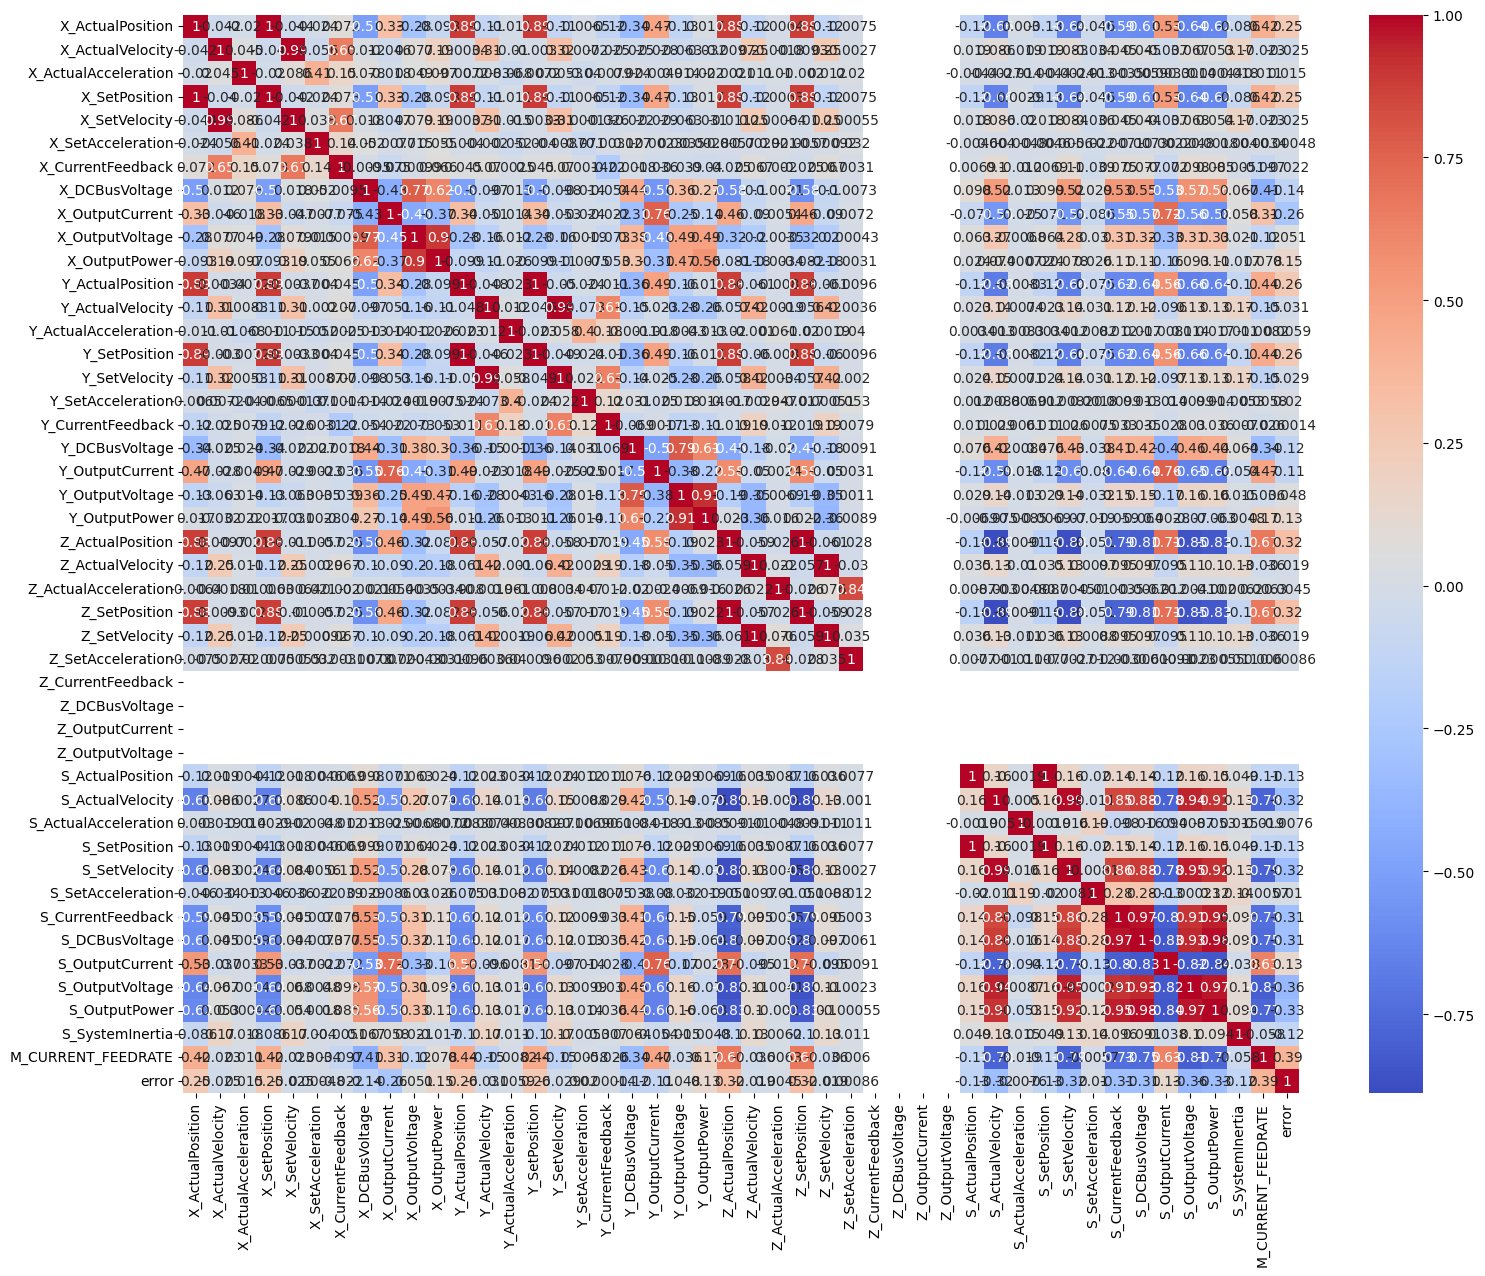

In [82]:
import seaborn as sns
plt.figure(figsize=(18, 14))
sns.heatmap(data_numeric.corr(), cmap='coolwarm', annot=True)

In [12]:
! pip install scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 1.3 MB/s eta 0:00:07
                                              0.1/8.3 MB 1.5 MB/s eta 0:00:06
                                              0.1/8.3 MB 1.1 MB/s eta 0:00:08
                                              0.2/8.3 MB 1.1 MB/s eta 0:00:08
     -                                        0.2/8.3 MB 1.3 MB/s eta 0:00:07
     -                                        0.3/8.3 MB 1.3 MB/s eta 0:00:07
     -                                        0.4/8.3 MB 1.2 MB/s eta 0:00:07
     --                                       0.4/8.3 MB 1.3 MB/s eta 0:00:07
     --                                       0.5/8.3 MB 1.3 MB/s eta 0:00:07
     --                                       0.5/8.3 MB 1.2 MB/s eta 0:00:07
     --                                       0.6/8.3 MB 1.2 MB/s eta 0:00:07
     ---                                      0.7/8.3 MB 1.2 MB/s eta 0

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [64]:
# 독립 변수와 종속 변수 분리
X = data[['X_ActualPosition', 'X_ActualVelocity', 'X_ActualAcceleration', 'X_SetPosition',
          'X_SetVelocity', 'X_SetAcceleration', 'X_CurrentFeedback', 'X_DCBusVoltage',
          'X_OutputCurrent', 'X_OutputVoltage', 'S_OutputCurrent', 'S_OutputVoltage',
          'S_OutputPower', 'S_SystemInertia','M_CURRENT_FEEDRATE']]
y = data['error']


In [20]:
pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 330.3 kB/s eta 0:00:23
                                              0.0/7.6 MB 281.8 kB/s eta 0:00:27
                                              0.1/7.6 MB 302.7 kB/s eta 0:00:25
                                              0.1/7.6 MB 327.7 kB/s eta 0:00:23
                                              0.1/7.6 MB 409.6 kB/s eta 0:00:19
                                              0.1/7.6 MB 426.7 kB/s eta 0:00:18
                                              0.2/7.6 MB 366.6 kB/s eta 0:00:21
                                              0.2/7.6 MB 374.9 kB/s eta 0:00:20
     -                                        0.2/7.6 MB 406.9 kB/s eta 0:00:19
     -                                        0.2/7.6 MB 405.0 kB/s

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)            # Desired number of Cross Validation folds  #n_splits값이 클수록 오래걸림
accuracies = list()
max_attributes = X_test.shape[1]
depth_range = range(1, max_attributes)
for depth in depth_range:
    fold_accuracy = []
    rand_clf = RandomForestClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(X):
        X_train = X.iloc[train_fold]
        y_train = y.iloc[train_fold]
        X_valid = X.iloc[valid_fold]
        y_valid = y.iloc[valid_fold]
        
        model = rand_clf.fit(X_train, y_train)
        valid_acc = model.score(X_valid, y_valid)
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.674365
         2          0.677454
         3          0.707410
         4          0.740421
         5          0.787660
         6          0.785725
         7          0.806848
         8          0.807190
         9          0.807159
        10          0.803789
        11          0.805942
        12          0.803134
        13          0.802759
        14          0.801418


In [67]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=8)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))



훈련세트 정확도: 0.983
테스트세트 정확도: 0.907


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4303  242]
 [ 355 1510]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      4545
           1       0.86      0.81      0.83      1865

    accuracy                           0.91      6410
   macro avg       0.89      0.88      0.89      6410
weighted avg       0.91      0.91      0.91      6410



In [32]:
pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [ ]:
pip

X_ActualPosition : 0.028
X_ActualVelocity : 0.029
X_ActualAcceleration : 0.006
X_SetPosition : 0.034
X_SetVelocity : 0.025
X_SetAcceleration : 0.020
X_CurrentFeedback : 0.006
X_DCBusVoltage : 0.041
X_OutputCurrent : 0.244
X_OutputVoltage : 0.058
S_OutputCurrent : 0.167
S_OutputVoltage : 0.038
S_OutputPower : 0.032
S_SystemInertia : 0.042
M_CURRENT_FEEDRATE : 0.231


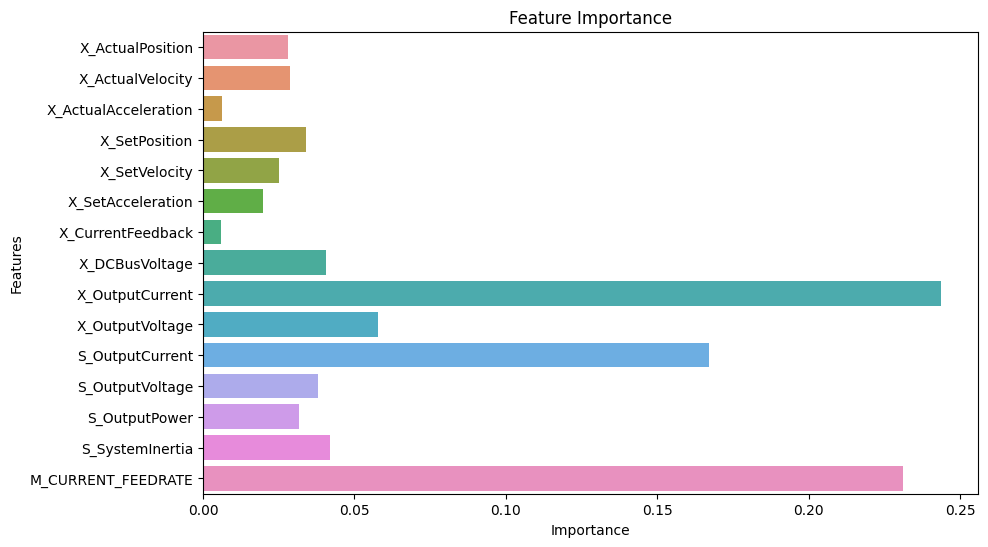

In [69]:
# feature importance 추출 
importances = rand_clf.feature_importances_

# feature별 importance 매핑
for name, value in zip(X.columns, importances):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


### 0.05 초과하는 변수

In [83]:
# feature importance가 0.05를 초과하는 변수 출력
for name, value in zip(X.columns, importances):
    if value > 0.05:
        print('{0} : {1:.3f}'.format(name, value))

X_OutputCurrent : 0.244
X_OutputVoltage : 0.058
S_OutputCurrent : 0.167
M_CURRENT_FEEDRATE : 0.231


In [85]:
# 독립 변수와 종속 변수 분리
X = data[['X_DCBusVoltage','X_OutputCurrent', 'X_OutputVoltage', 'S_OutputCurrent', 'M_CURRENT_FEEDRATE']]
y = data['error']


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)            # Desired number of Cross Validation folds  #n_splits값이 클수록 오래걸림
accuracies = list()
max_attributes = X_test.shape[1]
depth_range = range(1, max_attributes)
for depth in depth_range:
    fold_accuracy = []
    rand_clf = RandomForestClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(X):
        X_train = X.iloc[train_fold]
        y_train = y.iloc[train_fold]
        X_valid = X.iloc[valid_fold]
        y_valid = y.iloc[valid_fold]
        
        model = rand_clf.fit(X_train, y_train)
        valid_acc = model.score(X_valid, y_valid)
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.679014
         2          0.700794
         3          0.793713
         4          0.801513


In [88]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=4)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))


훈련세트 정확도: 0.941
테스트세트 정확도: 0.880


In [89]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4235  310]
 [ 458 1407]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4545
           1       0.82      0.75      0.79      1865

    accuracy                           0.88      6410
   macro avg       0.86      0.84      0.85      6410
weighted avg       0.88      0.88      0.88      6410



X_DCBusVoltage : 0.045
X_OutputCurrent : 0.242
X_OutputVoltage : 0.081
S_OutputCurrent : 0.222
M_CURRENT_FEEDRATE : 0.409


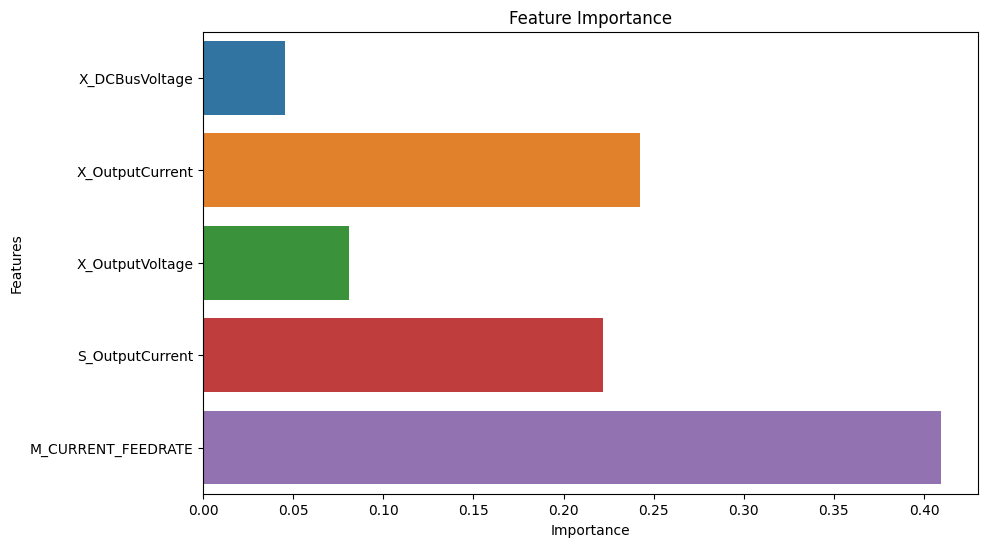

In [90]:
# feature importance 추출 
importances = rand_clf.feature_importances_

# feature별 importance 매핑
for name, value in zip(X.columns, importances):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [2]:
pip install tqdm

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
### pca데이터

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df=pd.read_csv('pca_df.csv')

In [7]:
df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,error
0,-6.920456,-0.309658,0.620367,-0.173396,-0.049644,-0.827059,-0.755742,-0.183551,-0.068302,0.028770,0
1,-4.784892,12.362205,-0.183452,-3.429405,-4.419887,-12.117577,11.793680,-2.896433,3.263805,-9.406541,0
2,-5.282790,13.396145,-1.747857,-0.250443,0.295654,-0.676489,-1.421421,-0.213414,0.038470,0.192557,0
3,-4.853765,13.562956,-1.445533,-0.543810,0.085093,-1.036796,-1.114068,-0.478896,0.068354,-0.079012,0
4,-4.863956,14.065081,-1.475919,-0.531293,0.382954,-0.455945,-1.290346,1.001518,-0.026901,0.237202,0
...,...,...,...,...,...,...,...,...,...,...,...
32043,-3.684435,-0.846086,-0.169259,0.188257,-0.500418,0.441328,0.123264,-0.031516,0.017223,-0.230674,0
32044,-3.783528,-0.937225,-0.223188,0.166550,-0.471444,0.534417,0.175258,0.012478,-0.089935,-0.021230,0
32045,-3.789268,-0.897572,-0.105550,-0.057339,-0.465578,0.547892,0.263335,0.132281,-0.167219,-0.160122,0
32046,-3.655781,-0.775281,-0.104295,0.051662,-0.468386,0.487903,0.164323,0.042852,-0.107660,-0.321314,0


In [9]:
# 독립 변수와 종속 변수 분리
X = df[['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10']]
y = df['error']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)            # Desired number of Cross Validation folds  #n_splits값이 클수록 오래걸림
accuracies = list()
max_attributes = X_test.shape[1]
depth_range = range(1, max_attributes)
for depth in depth_range:
    fold_accuracy = []
    rand_clf = RandomForestClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(X):
        X_train = X.iloc[train_fold]
        y_train = y.iloc[train_fold]
        X_valid = X.iloc[valid_fold]
        y_valid = y.iloc[valid_fold]
        
        model = rand_clf.fit(X_train, y_train)
        valid_acc = model.score(X_valid, y_valid)
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.707095
         2          0.719015
         3          0.728751
         4          0.733463
         5          0.732277
         6          0.741263
         7          0.751029
         8          0.759641
         9          0.766724


In [34]:
for i in (110,120,130,140):
    rand_clf = RandomForestClassifier(n_estimators = i, criterion='entropy', bootstrap=True, random_state=42, max_depth=9)
    rand_clf.fit(X_train, y_train)
    #relation_square = model.score(X_train, y_train)
    #print('결정계수 : ', relation_square)
    print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
    print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))


훈련세트 정확도: 0.975
테스트세트 정확도: 0.915
훈련세트 정확도: 0.976
테스트세트 정확도: 0.917
훈련세트 정확도: 0.976
테스트세트 정확도: 0.915
훈련세트 정확도: 0.976
테스트세트 정확도: 0.913


In [28]:
rand_clf = RandomForestClassifier(criterion='entropy',n_estimators = 120, bootstrap=True, random_state=42, max_depth=9)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))


훈련세트 정확도: 0.975
테스트세트 정확도: 0.915


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4307  238]
 [ 307 1558]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4545
           1       0.87      0.84      0.85      1865

    accuracy                           0.91      6410
   macro avg       0.90      0.89      0.90      6410
weighted avg       0.91      0.91      0.91      6410



In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import seaborn as sns

pca1 : 0.209
pca2 : 0.049
pca3 : 0.114
pca4 : 0.061
pca5 : 0.088
pca6 : 0.069
pca7 : 0.196
pca8 : 0.050
pca9 : 0.139
pca10 : 0.024


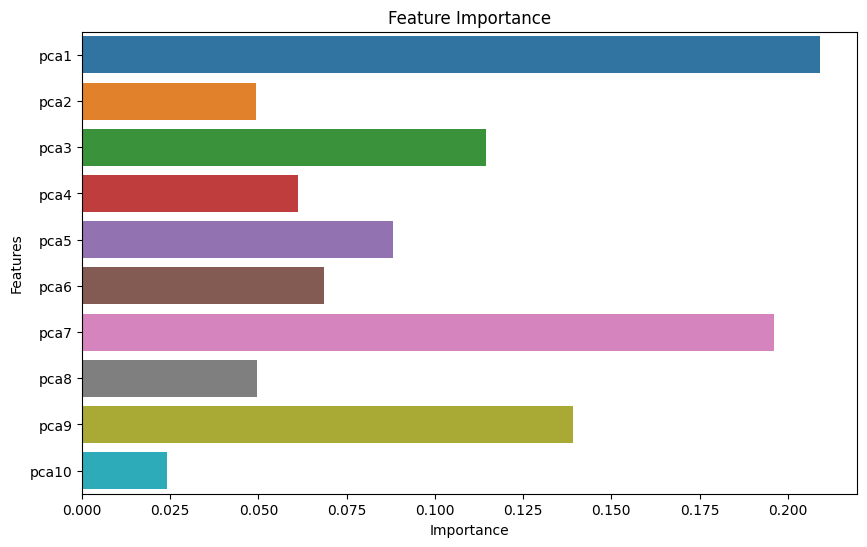

In [25]:
# feature importance 추출 
importances = rand_clf.feature_importances_

# feature별 importance 매핑
for name, value in zip(X.columns, importances):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)